In [1]:
import random 
random.seed(3456)
from v2.ddqn_agent import DDQNAgent

Using TensorFlow backend.


In [2]:
num_coins_per_order = 0 #0 means buy/sell all per order
recent_k = 150

# Always BUY

In [11]:
dummy = DDQNAgent(recent_k = 150, num_coins_per_order = num_coins_per_order, coin_name = "debug_always_buy",
                     external_states = ["current_price"],
                     internal_states = ["is_holding_coin"], epsilon_min = 0.01)

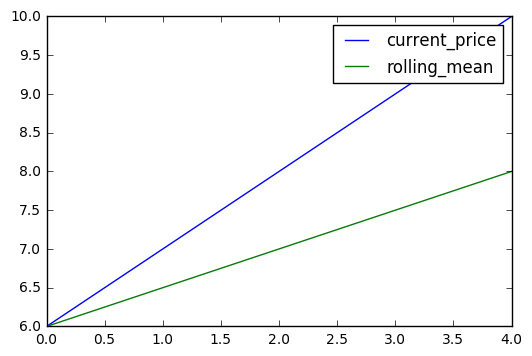

In [9]:
dummy.env.plot(states_to_plot=["current_price", "rolling_mean"])

In [12]:
dummy.train(num_episodes=300)

episode: 1/300, returns: 8.0886629, epsilon: 1.0
episode: 2/300, returns: 40.1149319, epsilon: 1.0
episode: 3/300, returns: 47.0297025, epsilon: 1.0
episode: 4/300, returns: 63.366336, epsilon: 1.0
episode: 5/300, returns: 10.2722709, epsilon: 1.0
episode: 6/300, returns: 12.0919535, epsilon: 1.0
episode: 7/300, returns: 8.0886629, epsilon: 1.0
episode: 8/300, returns: -1.980198, epsilon: 0.99
episode: 9/300, returns: 23.5299048, epsilon: 0.99
episode: 10/300, returns: 63.366336, epsilon: 0.99
episode: 11/300, returns: 26.0254568, epsilon: 0.98
episode: 12/300, returns: 47.0297025, epsilon: 0.98
episode: 13/300, returns: 22.5247386, epsilon: 0.97
episode: 14/300, returns: 42.3389817, epsilon: 0.97
episode: 15/300, returns: 22.5247386, epsilon: 0.96
episode: 16/300, returns: 40.0282841, epsilon: 0.96
episode: 17/300, returns: 63.366336, epsilon: 0.95
episode: 18/300, returns: 24.5466081, epsilon: 0.95
episode: 19/300, returns: 26.0254568, epsilon: 0.94
episode: 20/300, returns: 22.52473

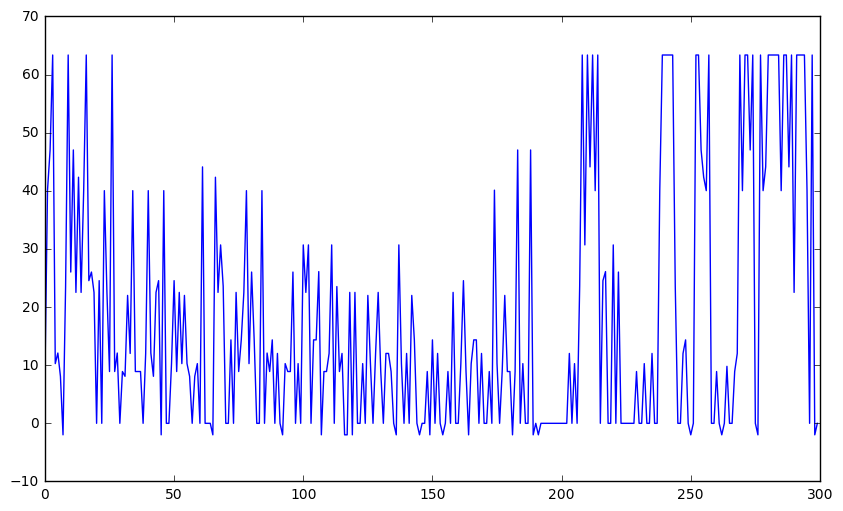

In [13]:
dummy.plot_cum_returns()

In [30]:
dummy.test(epsilon=0.23)

Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
0.0


In [38]:
dummy.print_my_memory()

[6.0, 0]_Action.BUY_-9.900989_[7.0, 1]_False
41


[6.0, 0]_Action.BUY_-9.90099_[6.0, 1]_False
83


[6.0, 0]_Action.HOLD_0.0_[6.0, 0]_False
217


[6.0, 0]_Action.HOLD_0.0_[7.0, 0]_False
176


[6.0, 1]_Action.HOLD_163.366335_[7.0, 1]_False
54


[6.0, 1]_Action.SELL_143.564355_[7.0, 0]_False
29


[7.0, 0]_Action.BUY_-11.322416_[8.0, 1]_False
7


[7.0, 0]_Action.BUY_-9.900984_[8.0, 1]_False
38


[7.0, 0]_Action.HOLD_0.0_[8.0, 0]_False
160


[7.0, 1]_Action.HOLD_140.028273_[8.0, 1]_False
21


[7.0, 1]_Action.HOLD_163.366335_[8.0, 1]_False
44


[7.0, 1]_Action.SELL_120.226295_[8.0, 0]_False
20


[7.0, 1]_Action.SELL_306.93069_[8.0, 0]_False
10


[8.0, 0]_Action.BUY_-11.091348_[9.0, 1]_False
5


[8.0, 0]_Action.BUY_-11.322414_[9.0, 1]_False
6


[8.0, 0]_Action.BUY_-12.939903_[9.0, 1]_False
3


[8.0, 0]_Action.BUY_-9.90099_[9.0, 1]_False
27


[8.0, 0]_Action.HOLD_0.0_[9.0, 0]_False
149


[8.0, 1]_Action.HOLD_122.524677_[9.0, 1]_False
15


[8.0, 1]_Action.HOLD_140.028273_[9.0, 1]_False
13


[8.

In [14]:
print dummy.model.predict([6.0, 0])

[[ 284.91897583  328.77301025  328.31570435]]


In [15]:
print dummy.model.predict([6.5, 0])

[[ 298.62496948  344.59396362  344.13156128]]


In [16]:
print dummy.model.predict([7.0, 0])

[[ 312.33084106  360.41491699  359.94732666]]


In [17]:
print dummy.model.predict([7.0, 1])

[[ 422.32217407  487.37942505  486.87060547]]


In [18]:
print dummy.model.predict([8.0, 0])

[[ 339.74273682  392.05682373  391.57901001]]


## Thoughts
* is the model really learning something useful here?
* why is it learning such astronomical values? did we do something wrong?
    * so the model should predict the final state correctly right???? why is the 190, 199...etc. wtf

In [22]:
import numpy as np 

def __test_replay(self, batch_size):
        minibatch = random.sample(self.memory, self.batch_size)
        
        for state, action, reward, next_state, isDone in minibatch:
            target = self.model.predict(state)
            if isDone:
                target[0][action.value] = reward
                print "yep!"
                print state, action, reward, next_state, isDone
            else:
                a = self.model.predict(next_state)[0]
                t = self.target_model.predict(next_state)[0]
                target[0][action.value] = reward + self.gamma * t[np.argmax(a)]
            print "state", state, "target", target
                ## -0.60 + gamma * -0.50
            self.model.train(state, target)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [23]:
__test_replay(dummy, 30)

state [8.0, 0] target [[ 340.74099731  495.11907959  389.05206299]]
state [7.0, 1] target [[ 617.3684082   490.59194946  484.08444214]]
state [8.0, 1] target [[ 450.75723267  522.36547852  650.02923584]]
state [6.0, 0] target [[ 302.47067261  330.5440979   325.63439941]]
state [8.0, 0] target [[ 389.7746582   394.20410156  388.32540894]]
state [8.0, 0] target [[ 389.7746582   394.50875854  388.54464722]]
yep!
[9.0, 0] Action.BUY -10.91804 [10.0, 1] True
state [9.0, 0] target [[ 367.31570435  -10.91804028  420.12155151]]
yep!
[9.0, 0] Action.HOLD 0.0 [10.0, 0] True
state [9.0, 0] target [[   0.          425.35284424  419.57781982]]
yep!
[9.0, 1] Action.HOLD 140.028273 [10.0, 1] True
state [9.0, 1] target [[ 140.02827454  552.1897583   545.62518311]]
state [8.0, 0] target [[ 389.7746582   390.13473511  385.92327881]]
state [6.0, 0] target [[ 281.15097046  438.33776855  322.88171387]]
state [6.0, 0] target [[ 331.57199097  325.04333496  322.11419678]]
state [8.0, 1] target [[ 442.07009888

# Never BUY

In [25]:
dummy_hold = DDQNAgent(recent_k = 150, num_coins_per_order = num_coins_per_order, coin_name = "debug_never_buy",
                     external_states = ["current_price"],
                     internal_states = ["is_holding_coin"], epsilon_min = 0.01)

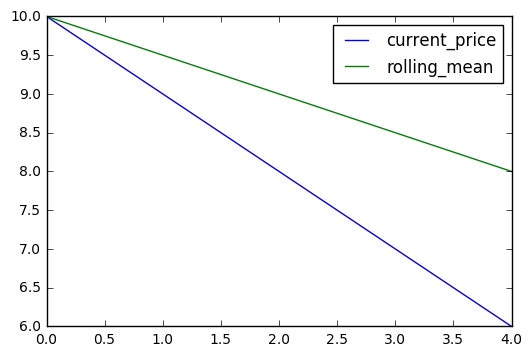

In [26]:
dummy_hold.env.plot(states_to_plot=["current_price", "rolling_mean"])

In [27]:
dummy_hold.train(num_episodes=300)

episode: 1/300, returns: -25.2720312, epsilon: 1.0
episode: 2/300, returns: -15.9310269, epsilon: 1.0
episode: 3/300, returns: -15.9310269, epsilon: 1.0
episode: 4/300, returns: -26.4851334, epsilon: 1.0
episode: 5/300, returns: -23.762376, epsilon: 1.0
episode: 6/300, returns: -31.3861383, epsilon: 1.0
episode: 7/300, returns: -26.4851322, epsilon: 1.0
episode: 8/300, returns: 0.0, epsilon: 0.99
episode: 9/300, returns: -15.9830251, epsilon: 0.99
episode: 10/300, returns: -21.5841582, epsilon: 0.99
episode: 11/300, returns: -34.653465, epsilon: 0.98
episode: 12/300, returns: -32.7448275, epsilon: 0.98
episode: 13/300, returns: -11.7821781, epsilon: 0.97
episode: 14/300, returns: 0.0, epsilon: 0.97
episode: 15/300, returns: -34.1173724, epsilon: 0.96
episode: 16/300, returns: -24.3379241, epsilon: 0.96
episode: 17/300, returns: -23.762376, epsilon: 0.95
episode: 18/300, returns: -34.1173736, epsilon: 0.95
episode: 19/300, returns: -26.4851334, epsilon: 0.94
episode: 20/300, returns: -2

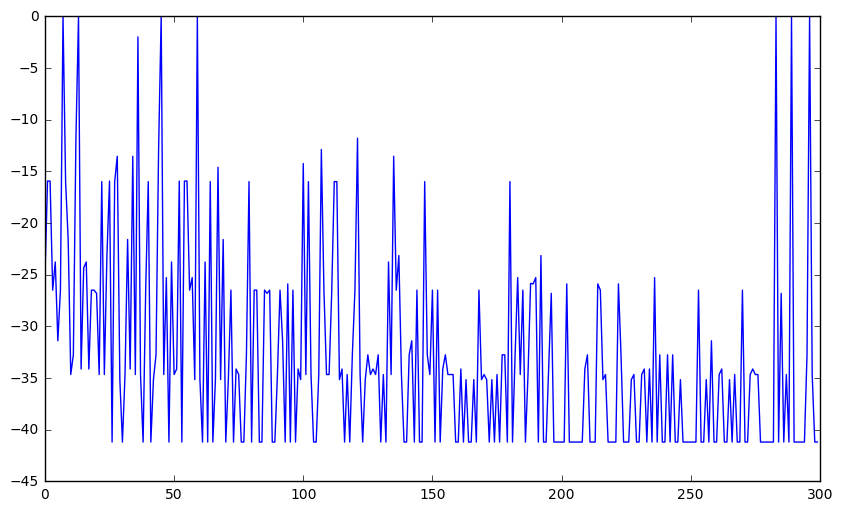

In [28]:
dummy_hold.plot_cum_returns()

In [29]:
dummy_hold.test(epsilon=0.23)

Action.BUY
Action.SELL
Action.HOLD
Action.BUY
Action.SELL
-25.8820469


# BUY & SELL

In [31]:
dummy_both = DDQNAgent(recent_k = 150, num_coins_per_order = num_coins_per_order, coin_name = "debug_buy_sell_hold",
                     external_states = ["current_price"],
                     internal_states = ["is_holding_coin"], epsilon_min = 0.01)

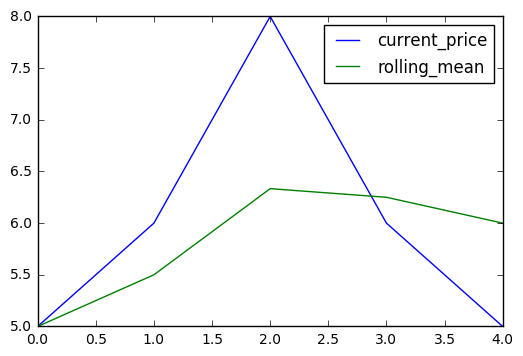

In [32]:
dummy_both.env.plot(states_to_plot=["current_price", "rolling_mean"])

In [33]:
dummy_both.train(num_episodes=300)

episode: 1/300, returns: 17.6237622, epsilon: 1.0
episode: 2/300, returns: -1.980198, epsilon: 1.0
episode: 3/300, returns: -26.4851322, epsilon: 1.0
episode: 4/300, returns: -18.3168315, epsilon: 1.0
episode: 5/300, returns: 15.2945792, epsilon: 1.0
episode: 6/300, returns: 30.693069, epsilon: 1.0
episode: 7/300, returns: 56.8316826, epsilon: 1.0
episode: 8/300, returns: 28.1050935, epsilon: 0.99
episode: 9/300, returns: 30.693069, epsilon: 0.99
episode: 10/300, returns: 6.7542429, epsilon: 0.99
episode: 11/300, returns: -18.3168315, epsilon: 0.98
episode: 12/300, returns: -26.4851322, epsilon: 0.98
episode: 13/300, returns: -27.9408685, epsilon: 0.97
episode: 14/300, returns: -15.2413474, epsilon: 0.97
episode: 15/300, returns: 28.105088, epsilon: 0.96
episode: 16/300, returns: -26.4851322, epsilon: 0.96
episode: 17/300, returns: 30.693069, epsilon: 0.95
episode: 18/300, returns: -18.3168315, epsilon: 0.95
episode: 19/300, returns: -18.3168315, epsilon: 0.94
episode: 20/300, returns:

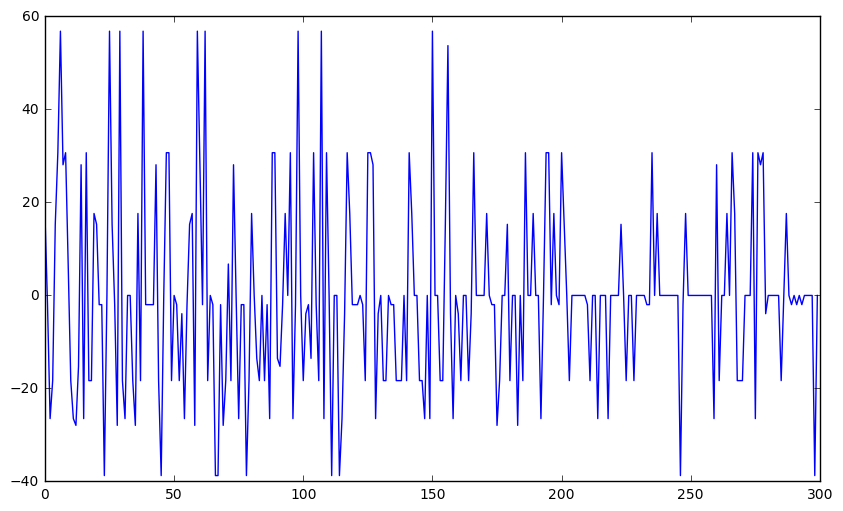

In [35]:
dummy_both.plot_cum_returns()

In [37]:
dummy_both.test(epsilon=0.23)

Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
Action.HOLD
0.0
